# **Problem Statement**

## Business Context

A sales forecast is a prediction of future sales revenue based on historical data, industry trends, and the status of the current sales pipeline. Businesses use the sales forecast to estimate weekly, monthly, quarterly, and annual sales totals. A company needs to make an accurate sales forecast as it adds value across an organization and helps the different verticals to chalk out their future course of action.

Forecasting helps an organization plan its sales operations by region and provides valuable insights to the supply chain team regarding the procurement of goods and materials. An accurate sales forecast process has many benefits which include improved decision-making about the future and reduction of sales pipeline and forecast risks. Moreover, it helps to reduce the time spent in planning territory coverage and establish benchmarks that can be used to assess trends in the future.

## Objective

SuperKart is a retail chain operating supermarkets and food marts across various tier cities, offering a wide range of products. To optimize its inventory management and make informed decisions around regional sales strategies, SuperKart wants to accurately forecast the sales revenue of its outlets for the upcoming quarter.

To operationalize these insights at scale, the company has partnered with a data science firm—not just to build a predictive model based on historical sales data, but to develop and deploy a robust forecasting solution that can be integrated into SuperKart’s decision-making systems and used across its network of stores.

## Data Description

The data contains the different attributes of the various products and stores.The detailed data dictionary is given below.

- **Product_Id** - unique identifier of each product, each identifier having two letters at the beginning followed by a number.
- **Product_Weight** - weight of each product
- **Product_Sugar_Content** - sugar content of each product like low sugar, regular and no sugar
- **Product_Allocated_Area** - ratio of the allocated display area of each product to the total display area of all the products in a store
- **Product_Type** - broad category for each product like meat, snack foods, hard drinks, dairy, canned, soft drinks, health and hygiene, baking goods, bread, breakfast, frozen foods, fruits and vegetables, household, seafood, starchy foods, others
- **Product_MRP** - maximum retail price of each product
- **Store_Id** - unique identifier of each store
- **Store_Establishment_Year** - year in which the store was established
- **Store_Size** - size of the store depending on sq. feet like high, medium and low
- **Store_Location_City_Type** - type of city in which the store is located like Tier 1, Tier 2 and Tier 3. Tier 1 consists of cities where the standard of living is comparatively higher than its Tier 2 and Tier 3 counterparts.
- **Store_Type** - type of store depending on the products that are being sold there like Departmental Store, Supermarket Type 1, Supermarket Type 2 and Food Mart
- **Product_Store_Sales_Total** - total revenue generated by the sale of that particular product in that particular store


# **Installing and Importing the necessary libraries**

In [1]:
#Installing the libraries with the specified versions
!pip install numpy==2.0.2 pandas==2.2.2 scikit-learn==1.6.1 matplotlib==3.10.0 seaborn==0.13.2 joblib==1.4.2 xgboost==2.1.4 requests==2.32.3 huggingface_hub==0.30.1 -q

**Note:**

- After running the above cell, kindly restart the notebook kernel (for Jupyter Notebook) or runtime (for Google Colab) and run all cells sequentially from the next cell.

- On executing the above line of code, you might see a warning regarding package dependencies. This error message can be ignored as the above code ensures that all necessary libraries and their dependencies are maintained to successfully execute the code in this notebook.

In [2]:
import warnings
warnings.filterwarnings("ignore")

# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# For splitting the dataset
from sklearn.model_selection import train_test_split

# Libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 100)


# Libraries different ensemble classifiers
from sklearn.ensemble import (
    BaggingRegressor,
    RandomForestRegressor,
    AdaBoostRegressor,
    GradientBoostingRegressor,
)
from xgboost import XGBRegressor
from sklearn.tree import DecisionTreeRegressor

# Libraries to get different metric scores
from sklearn.metrics import (
    confusion_matrix,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    mean_squared_error,
    mean_absolute_error,
    r2_score,
    mean_absolute_percentage_error
)

# To create the pipeline
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline,Pipeline

# To tune different models and standardize
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler,OneHotEncoder

# To serialize the model
import joblib

# os related functionalities
import os

# API request
import requests

# for hugging face space authentication to upload files
from huggingface_hub import login, HfApi

# **Loading the dataset**

In [3]:
data=pd.read_csv("/content/SuperKart.csv")

# **Data Overview**

In [4]:
data.head()

,Product_Id,Product_Weight,Product_Sugar_Content,Product_Allocated_Area,Product_Type,Product_MRP,Store_Id,Store_Establishment_Year,Store_Size,Store_Location_City_Type,Store_Type,Product_Store_Sales_Total
0,FD6114,12.66,Low Sugar,0.027,Frozen Foods,117.08,OUT004,2009,Medium,Tier 2,Supermarket Type2,2842.40
1,FD7839,16.54,Low Sugar,0.144,Dairy,171.43,OUT003,1999,Medium,Tier 1,Departmental Store,4830.02
2,FD5075,14.28,Regular,0.031,Canned,162.08,OUT001,1987,High,Tier 2,Supermarket Type1,4130.16
3,FD8233,12.10,Low Sugar,0.112,Baking Goods,186.31,OUT001,1987,High,Tier 2,Supermarket Type1,4132.18
4,NC1180,9.57,No Sugar,0.010,Health and Hygiene,123.67,OUT002,1998,Small,Tier 3,Food Mart,2279.36


In [5]:
data.tail()

,Product_Id,Product_Weight,Product_Sugar_Content,Product_Allocated_Area,Product_Type,Product_MRP,Store_Id,Store_Establishment_Year,Store_Size,Store_Location_City_Type,Store_Type,Product_Store_Sales_Total
8758,NC7546,14.80,No Sugar,0.016,Health and Hygiene,140.53,OUT004,2009,Medium,Tier 2,Supermarket Type2,3806.53
8759,NC584,14.06,No Sugar,0.142,Household,144.51,OUT004,2009,Medium,Tier 2,Supermarket Type2,5020.74
8760,NC2471,13.48,No Sugar,0.017,Health and Hygiene,88.58,OUT001,1987,High,Tier 2,Supermarket Type1,2443.42
8761,NC7187,13.89,No Sugar,0.193,Household,168.44,OUT001,1987,High,Tier 2,Supermarket Type1,4171.82
8762,FD306,14.73,Low Sugar,0.177,Snack Foods,224.93,OUT002,1998,Small,Tier 3,Food Mart,2186.08


In [6]:
data.describe()

,Product_Weight,Product_Allocated_Area,Product_MRP,Store_Establishment_Year,Product_Store_Sales_Total
count,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000
mean,12.653792,0.068786,147.032539,2002.032751,3464.003640
std,2.217320,0.048204,30.694110,8.388381,1065.630494
min,4.000000,0.004000,31.000000,1987.000000,33.000000
25%,11.150000,0.031000,126.160000,1998.000000,2761.715000
50%,12.660000,0.056000,146.740000,2009.000000,3452.340000
75%,14.180000,0.096000,167.585000,2009.000000,4145.165000
max,22.000000,0.298000,266.000000,2009.000000,8000.000000


In [7]:
data.duplicated().sum()

np.int64(0)

# **Exploratory Data Analysis (EDA)**

## Univariate Analysis

In [8]:
data.columns

Index(['Product_Id', 'Product_Weight', 'Product_Sugar_Content',
       'Product_Allocated_Area', 'Product_Type', 'Product_MRP', 'Store_Id',
       'Store_Establishment_Year', 'Store_Size', 'Store_Location_City_Type',
       'Store_Type', 'Product_Store_Sales_Total'],
      dtype='object')

<Figure size 1500x600 with 0 Axes>

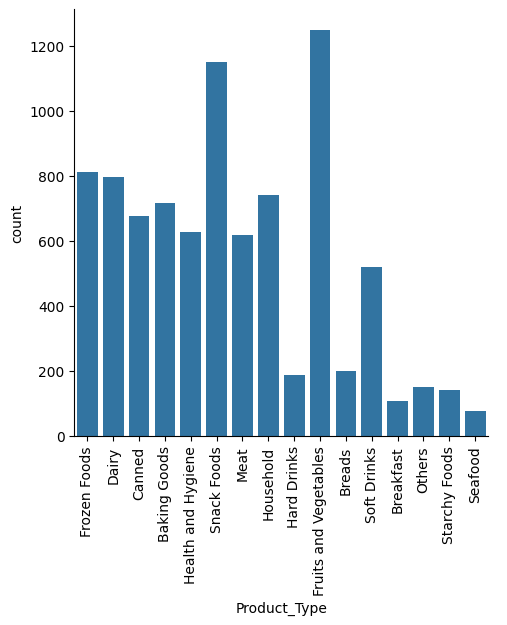

In [9]:
plt.figure(figsize=(15, 6)) # Adjust figure size as needed
sns.catplot(data=data, x="Product_Type", kind="count")
plt.xticks(rotation=90) # Rotate x-axis labels by 90 degrees
plt.show() # Ensure the plot is displayed

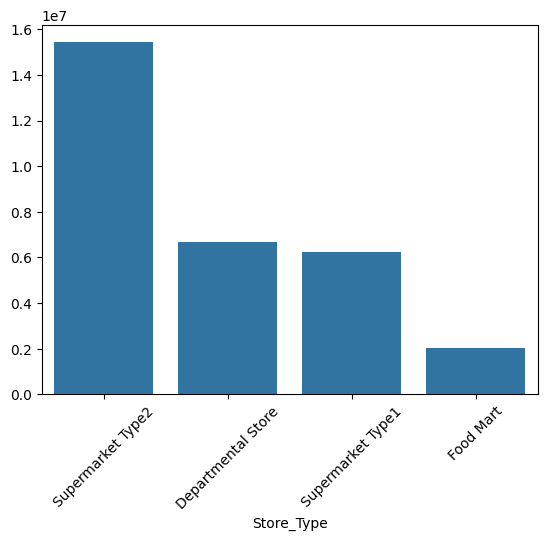

In [10]:
store_sales=data.groupby("Store_Type")["Product_Store_Sales_Total"].sum().sort_values(ascending=False)
sns.barplot(x=store_sales.index,y=store_sales.values)
plt.xticks(rotation=45) # Rotate x-axis labels by 90 degrees
plt.show() # Ensure the plot is displayed

<Axes: xlabel='Product_Weight', ylabel='Count'>

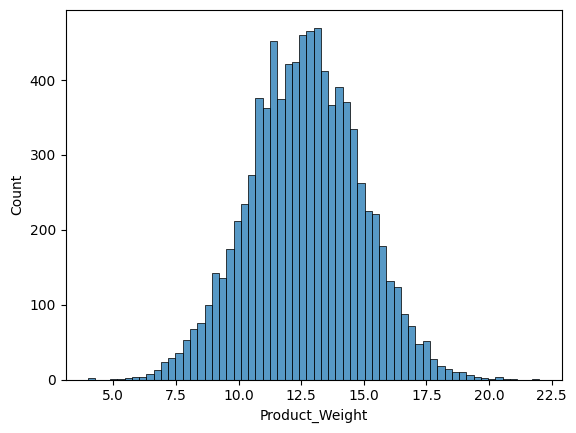

In [11]:
sns.histplot(data=data,x="Product_Weight")

## Bivariate Analysis

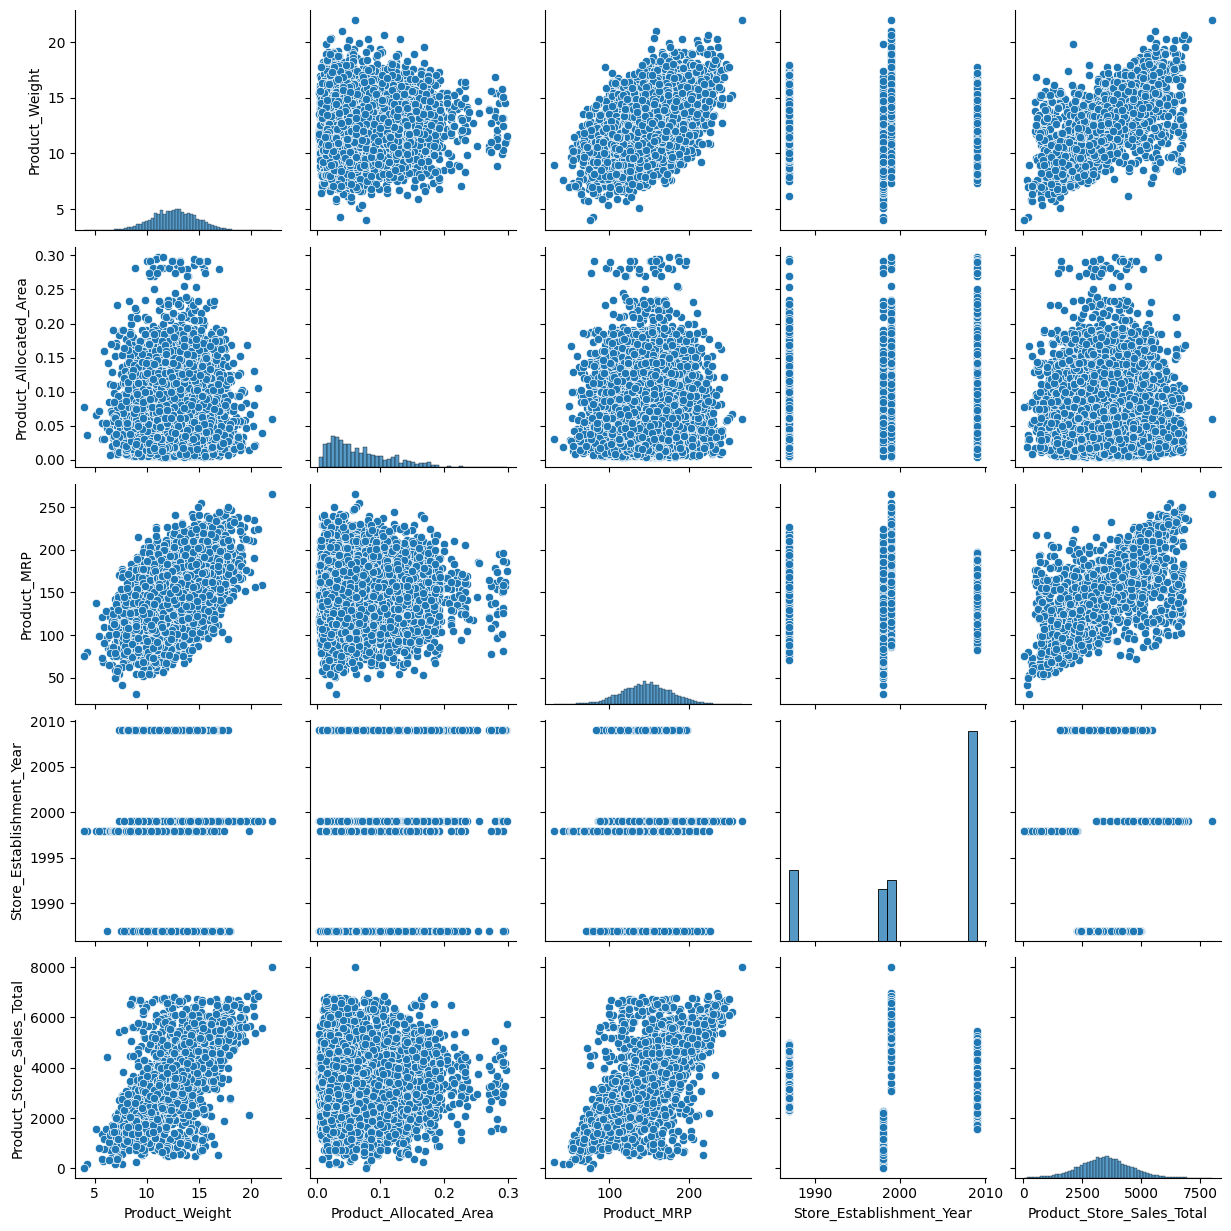

In [12]:
sns.pairplot(data)

<Axes: >

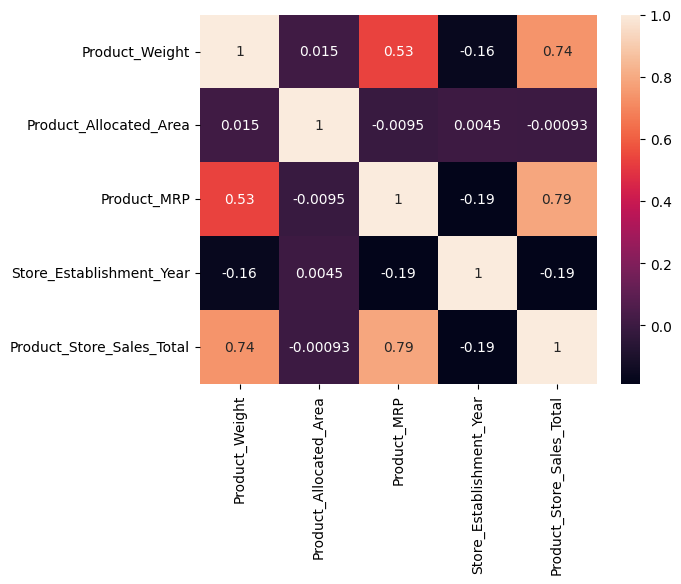

In [13]:
data_num=data.select_dtypes(include=np.number)
sns.heatmap(data_num.corr(),annot=True)

<Axes: xlabel='Product_Weight', ylabel='Product_Store_Sales_Total'>

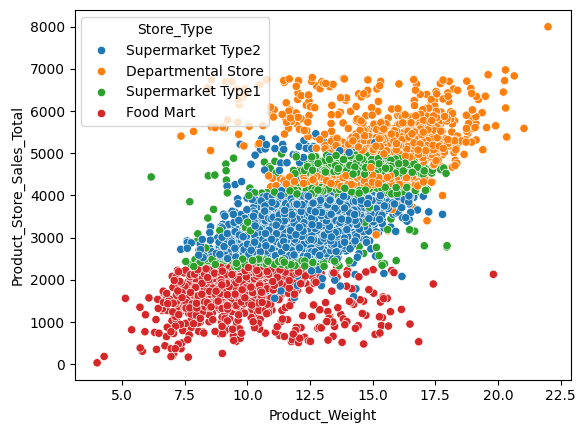

In [14]:
sns.scatterplot(data=data,x="Product_Weight",y="Product_Store_Sales_Total",hue="Store_Type")

# **Data Preprocessing**

In [15]:
data.head()

,Product_Id,Product_Weight,Product_Sugar_Content,Product_Allocated_Area,Product_Type,Product_MRP,Store_Id,Store_Establishment_Year,Store_Size,Store_Location_City_Type,Store_Type,Product_Store_Sales_Total
0,FD6114,12.66,Low Sugar,0.027,Frozen Foods,117.08,OUT004,2009,Medium,Tier 2,Supermarket Type2,2842.40
1,FD7839,16.54,Low Sugar,0.144,Dairy,171.43,OUT003,1999,Medium,Tier 1,Departmental Store,4830.02
2,FD5075,14.28,Regular,0.031,Canned,162.08,OUT001,1987,High,Tier 2,Supermarket Type1,4130.16
3,FD8233,12.10,Low Sugar,0.112,Baking Goods,186.31,OUT001,1987,High,Tier 2,Supermarket Type1,4132.18
4,NC1180,9.57,No Sugar,0.010,Health and Hygiene,123.67,OUT002,1998,Small,Tier 3,Food Mart,2279.36


In [16]:
data.shape

(8763, 12)

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
data["store_history"]=2025-data["Store_Establishment_Year"]
data.drop(columns=["Store_Establishment_Year","Store_Id","Product_Id"],inplace=True)
# Create and fit label encoders

data_cat = data.select_dtypes(include="object").columns
# Create and fit label encoders
label_encoders = {}
for col in data_cat:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le


# Assuming 'data' is your DataFrame
x = data.drop(columns=["Product_Store_Sales_Total"])
y = data["Product_Store_Sales_Total"]

# Splitting the data into training, validation, and test sets
x_train, x_temp, y_train, y_temp = train_test_split(x, y, test_size=0.4, random_state=42)
x_val, x_test, y_val, y_test = train_test_split(x_temp, y_temp, test_size=0.5, random_state=42)

# Scaling numerical features
mm = MinMaxScaler()
data_num = x_train.select_dtypes(include=np.number).columns

# Fit the scaler on the training data and transform it
x_train[data_num] = mm.fit_transform(x_train[data_num])

# Transform the validation and test sets using the same scaler
x_val[data_num] = mm.transform(x_val[data_num])
x_test[data_num] = mm.transform(x_test[data_num])



# Display the transformed training data
print(x_train.head())

      Product_Weight  Product_Sugar_Content  Product_Allocated_Area  \
2004        0.636667               0.333333                0.076389   
1194        0.548333               0.000000                0.333333   
6176        0.365556               0.000000                0.041667   
3409        0.372222               0.000000                0.128472   
6664        0.561111               0.666667                0.093750   

      Product_Type  Product_MRP  Store_Size  Store_Location_City_Type  \
2004      0.600000     0.563765         0.0                       0.5   
1194      0.933333     0.595312         0.5                       0.0   
6176      0.400000     0.438227         0.5                       0.5   
3409      0.000000     0.511790         0.5                       0.5   
6664      0.666667     0.488072         0.5                       0.5   

      Store_Type  store_history  
2004    0.666667       1.000000  
1194    0.000000       0.454545  
6176    1.000000       0.000000 

# **Model Building**

## Define functions for Model Evaluation

In [18]:
# function to compute adjusted R-squared
def adj_r2_score(predictors, targets, predictions):
    r2 = r2_score(targets, predictions)
    n = predictors.shape[0]
    k = predictors.shape[1]
    return 1 - ((1 - r2) * (n - 1) / (n - k - 1))


# function to compute different metrics to check performance of a regression model
def model_performance_regression(model, predictors, target):
    """
    Function to compute different metrics to check regression model performance

    model: regressor
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    r2 = r2_score(target, pred)  # to compute R-squared
    adjr2 = adj_r2_score(predictors, target, pred)  # to compute adjusted R-squared
    rmse = np.sqrt(mean_squared_error(target, pred))  # to compute RMSE
    mae = mean_absolute_error(target, pred)  # to compute MAE
    mape = mean_absolute_percentage_error(target, pred)  # to compute MAPE

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "RMSE": rmse,
            "MAE": mae,
            "R-squared": r2,
            "Adj. R-squared": adjr2,
            "MAPE": mape,
        },
        index=[0],
    )

    return df_perf

The ML models to be built can be any two out of the following:
1. Decision Tree
2. Bagging
3. Random Forest
4. AdaBoost
5. Gradient Boosting
6. XGBoost

In [19]:
model=[AdaBoostRegressor(random_state=42),GradientBoostingRegressor(random_state=42),XGBRegressor(random_state=42)]
for i in model:
  print(i)
  i.fit(x_train,y_train)
  print(model_performance_regression(i,x_train,y_train))
  print(model_performance_regression(i,x_val,y_val))

AdaBoostRegressor(random_state=42)
         RMSE         MAE  R-squared  Adj. R-squared      MAPE
0  478.729701  379.732198   0.795767        0.795416  0.133276
         RMSE         MAE  R-squared  Adj. R-squared      MAPE
0  486.707817  388.167652    0.79606        0.795007  0.133313
GradientBoostingRegressor(random_state=42)
         RMSE         MAE  R-squared  Adj. R-squared      MAPE
0  287.280034  138.005534   0.926454        0.926328  0.051045
         RMSE         MAE  R-squared  Adj. R-squared      MAPE
0  307.006314  148.959674   0.918855        0.918436  0.056189
XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
  

# **Model Performance Improvement - Hyperparameter Tuning**

In [20]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

#adaboost
ada_model = AdaBoostRegressor(random_state=42)

ada_parameters = {
    #Let's try different max_depth for base_estimator
    "estimator":[DecisionTreeRegressor(max_depth=1),DecisionTreeRegressor(max_depth=2),
                      DecisionTreeRegressor(max_depth=3)],
    "n_estimators": np.arange(10,110,10),
    "learning_rate":np.arange(0.1,2,0.1)
}
ada_searchcv = RandomizedSearchCV(ada_model,ada_parameters,cv=5,n_jobs=-1,verbose=3,n_iter=100,random_state=42)
ada_searchcv.fit(x_train,y_train)
print(ada_searchcv.best_params_)
ada_tuned_train=model_performance_regression(ada_searchcv.best_estimator_,x_train,y_train)
ada_tuned_val=model_performance_regression(ada_searchcv.best_estimator_,x_val,y_val)


#Gradientboost
grad_model = GradientBoostingRegressor(random_state=42)

grad_parameters = {
    "n_estimators": [100,150,200,250],
    "subsample":[0.8,0.9,1],
    "max_features":[0.7,0.8,0.9,1],
    "learning_rate":np.arange(0.1,2,0.1)
}
grad_searchcv = RandomizedSearchCV(grad_model,grad_parameters,cv=5,n_jobs=-1,verbose=3,n_iter=100,random_state=42)
grad_searchcv.fit(x_train,y_train)
print(grad_searchcv.best_params_)
grad_tuned_train=model_performance_regression(grad_searchcv.best_estimator_,x_train,y_train)
grad_tuned_val=model_performance_regression(grad_searchcv.best_estimator_,x_val,y_val)



#XGBRegressor
XG_model=XGBRegressor(random_state=42)

XG_parameters = {
    "n_estimators": [10,30,50],
    "scale_pos_weight":[1,2,5],
    "subsample":[0.7,0.9,1],
    "learning_rate":[0.05, 0.1,0.2],
    "colsample_bytree":[0.7,0.9,1],
    "colsample_bylevel":[0.5,0.7,1]
}
XG_searchcv=RandomizedSearchCV(XG_model,XG_parameters,cv=5,n_jobs=-1,verbose=3,n_iter=100,random_state=42)
XG_searchcv.fit(x_train,y_train)
print(XG_searchcv.best_params_)
XG_tuned_train=model_performance_regression(XG_searchcv.best_estimator_,x_train,y_train)
XG_tuned_val=model_performance_regression(XG_searchcv.best_estimator_,x_val,y_val)





Fitting 5 folds for each of 100 candidates, totalling 500 fits
{'n_estimators': np.int64(40), 'learning_rate': np.float64(0.1), 'estimator': DecisionTreeRegressor(max_depth=3)}
Fitting 5 folds for each of 100 candidates, totalling 500 fits
{'subsample': 0.8, 'n_estimators': 200, 'max_features': 0.9, 'learning_rate': np.float64(0.1)}
Fitting 5 folds for each of 100 candidates, totalling 500 fits
{'subsample': 0.9, 'scale_pos_weight': 5, 'n_estimators': 50, 'learning_rate': 0.1, 'colsample_bytree': 1, 'colsample_bylevel': 0.7}


# **Model Performance Comparison, Final Model Selection, and Serialization**

In [21]:
tuned_model_perf=pd.concat([ada_tuned_train,ada_tuned_val,grad_tuned_train,grad_tuned_val,XG_tuned_train,XG_tuned_val],axis=0,ignore_index=True)
tuned_model_perf.index=["AdaBoost_train","AdaBoost_val","GradientBoost_train","GradientBoost_val","XGBoost_train","XGBoost_val"]
tuned_model_perf
best_model_test=model_performance_regression(XG_searchcv.best_estimator_,x_test,y_test)
best_model_test
XG_best_model=XG_searchcv.best_estimator_


In [22]:
print(tuned_model_perf)
print(best_model_test)

                           RMSE         MAE  R-squared  Adj. R-squared  \
AdaBoost_train       469.184131  365.720113   0.803830        0.803494   
AdaBoost_val         468.929150  368.780733   0.810687        0.809710   
GradientBoost_train  254.035887  109.643540   0.942491        0.942392   
GradientBoost_val    299.953362  130.480058   0.922541        0.922141   
XGBoost_train        237.820756   99.377727   0.949598        0.949512   
XGBoost_val          278.536886  119.648845   0.933207        0.932862   

                         MAPE  
AdaBoost_train       0.129608  
AdaBoost_val         0.127132  
GradientBoost_train  0.039793  
GradientBoost_val    0.049639  
XGBoost_train        0.038834  
XGBoost_val          0.045400  
         RMSE         MAE  R-squared  Adj. R-squared      MAPE
0  304.612109  132.284178   0.919198        0.918781  0.052217


# **Deployment - Backend**

## Flask Web Framework


In [23]:
os.makedirs("backend_files",exist_ok=True)
XG_best_model = XG_searchcv.best_estimator_
saved_model_path = "backend_files/XG_best_model.joblib"
joblib.dump(XG_best_model, saved_model_path)
joblib.dump(label_encoders, "backend_files/label_encoders.joblib")


['backend_files/label_encoders.joblib']

In [24]:
%%writefile backend_files/app.py
import joblib
import pandas as pd
from flask import Flask, request, jsonify

app = Flask("SuperKart Predictor")

# Load model and encoders
model = joblib.load("XG_best_model.joblib")
label_encoders = joblib.load("label_encoders.joblib")

@app.route('/', methods=['GET'])
def home():
    return "<h1>SuperKart Predictor</h1>"

@app.route('/predict', methods=['POST'])
def predict():
    # Get data from request
    data = request.get_json()
    df = pd.DataFrame([data])

    # Apply same encoding as training
    for column, encoder in label_encoders.items():
        df[column] = encoder.transform(df[column])

    # Add store_history feature
    df['store_history'] = 2025 - df['Store_Establishment_Year']

    # Drop columns not needed for prediction
    df.drop(columns=['Product_Id', 'Store_Id', 'Store_Establishment_Year'], inplace=True)

    # Make prediction
    prediction = model.predict(df)[0]

    return jsonify({"Prediction": str(prediction)})

if __name__ == '__main__':
    app.run(debug=True)


Overwriting backend_files/app.py


## Dependencies File

In [25]:
%%writefile backend_files/requirements.txt
pandas
numpy
scikit-learn
xgboost
joblib
Werkzeug
flask
gunicorn
requests
uvicorn[standard]

Overwriting backend_files/requirements.txt


## Dockerfile

In [26]:
%%writefile backend_files/Dockerfile
FROM python:3.9-slim

WORKDIR /app

# Copy all files from the current directory to the container's working directory
COPY . .

# Install dependencies from the requirements file without using cache to reduce image size
RUN pip install --no-cache-dir -r requirements.txt

# Define the command to start the application using Gunicorn with 4 worker processes
# - `-w 4`: Uses 4 worker processes for handling requests
# - `-b 0.0.0.0:7860`: Binds the server to port 7860 on all network interfaces
# - `app:app`: Runs the Flask app (assuming `app.py` contains the Flask instance named `app`)
CMD ["gunicorn", "-w", "4", "-b", "0.0.0.0:7860", "app:app"]

Overwriting backend_files/Dockerfile


## Setting up a Hugging Face Docker Space for the Backend

In [27]:
from google.colab import userdata
from huggingface_hub import login, HfApi

access_key = userdata.get('HF_TOKEN')  # Retrieve your secret by name
repo_id = "Afifi00/Flask_SuperKart_Prediction"  # Your Hugging Face space id

# Login to Hugging Face platform with the access token
login(token=access_key)

# Initialize the API
api = HfApi()

# Upload Streamlit app files stored in the folder called deployment_files
api.upload_folder(
    folder_path="/content/backend_files",  # Local folder path
    repo_id=repo_id,  # Hugging face space id
    repo_type="space",  # Hugging face repo type "space"
)


No files have been modified since last commit. Skipping to prevent empty commit.


CommitInfo(commit_url='https://huggingface.co/spaces/Afifi00/Flask_SuperKart_Prediction/commit/dc6ba351ef1c686b7e4aab8625a43f50764d0819', commit_message='Upload folder using huggingface_hub', commit_description='', oid='dc6ba351ef1c686b7e4aab8625a43f50764d0819', pr_url=None, repo_url=RepoUrl('https://huggingface.co/spaces/Afifi00/Flask_SuperKart_Prediction', endpoint='https://huggingface.co', repo_type='space', repo_id='Afifi00/Flask_SuperKart_Prediction'), pr_revision=None, pr_num=None)

# **Deployment - Frontend**

## Points to note before executing the below cells
- Create a Streamlit space on Hugging Face by following the instructions provided on the content page titled **`Creating Spaces and Adding Secrets in Hugging Face`** from Week 1

## Streamlit for Interactive UI

In [28]:
import os
os.makedirs("frontend_files",exist_ok=True)

In [29]:
%%writefile frontend_files/app.py
import streamlit as st
import requests

st.title("SuperKart Prediction App")

Flask_url = "https://afifi00-flask-superkart-prediction.hf.space"



Product_Id = st.text_input("Product_Id",
                                 value="FD6114",
                                 help="Enter product identifier (e.g., FD6114, NC1180, DR2699)")

Product_Weight = st.number_input("Product_Weight",
                                       value=12.66,
                                       min_value=5.81,
                                       max_value=21.04,
                                       step=0.01,
                                       format="%.2f",
                                       help="Weight of the product")

Product_Sugar_Content = st.selectbox("Product_Sugar_Content",
                                           ["Low Sugar", "Regular", "No Sugar", "reg"],
                                           index=0,
                                           help="Sugar content level of the product")

Product_Allocated_Area = st.number_input("Product_Allocated_Area",
                                               value=0.027,
                                               min_value=0.004,
                                               max_value=0.297,
                                               step=0.001,
                                               format="%.6f",
                                               help="Space allocated for product display")

Product_Type = st.selectbox("Product_Type",
                                   ["Frozen Foods", "Dairy", "Canned", "Baking Goods",
                                    "Health and Hygiene", "Snack Foods", "Meat",
                                    "Fruits and Vegetables", "Household", "Breakfast",
                                    "Hard Drinks", "Breads", "Starchy Foods", "Others",
                                    "Seafood", "Soft Drinks"],
                                   index=0,
                                   help="Category/type of the product")

Product_MRP = st.number_input("Product_MRP",
                                    value=117.08,
                                    min_value=31.23,
                                    max_value=266.89,
                                    step=0.01,
                                    format="%.2f",
                                    help="Maximum Retail Price of the product")



Store_Id = st.text_input("Store_Id",
                                value="OUT004",
                                help="Store identifier (e.g., OUT004, OUT003, OUT001, OUT002)")

Store_Establishment_Year = st.number_input("Store_Establishment_Year",
                                                 min_value=1985,
                                                 max_value=2009,
                                                 value=2009,
                                                 step=1,
                                                 help="Year when the store was established")

Store_Size = st.selectbox("Store_Size",
                                 ["Small", "Medium", "High"],
                                 index=1,  # Default to "Medium"
                                 help="Size category of the store")

Store_Location_City_Type = st.selectbox("Store_Location_City_Type",
                                              ["Tier 1", "Tier 2", "Tier 3"],
                                              index=1,  # Default to "Tier 2"
                                              help="City tier classification")

Store_Type = st.selectbox("Store_Type",
                                 ["Supermarket Type1", "Supermarket Type2", "Supermarket Type3",
                                  "Departmental Store", "Food Mart", "Grocery Store"],
                                 index=1,  # Default to "Supermarket Type2"
                                 help="Type/format of the store")


data = {
            "Product_Id": Product_Id,
            "Product_Weight": Product_Weight,
            "Product_Sugar_Content": Product_Sugar_Content,
            "Product_Allocated_Area": Product_Allocated_Area,
            "Product_Type": Product_Type,
            "Product_MRP": Product_MRP,
            "Store_Id": Store_Id,
            "Store_Establishment_Year": Store_Establishment_Year,
            "Store_Size": Store_Size,
            "Store_Location_City_Type": Store_Location_City_Type,
            "Store_Type": Store_Type
        }
if st.button("Predict"):
    response = requests.post(f"{Flask_url}/predict", json=data)
    if response.status_code == 200:
        result = response.json()
        SuperKart_prediction = result.get("Prediction", "No Prediction returned")
        st.write(f"Based on the information provided, the product with ID {Product_Id} has sales total: {SuperKart_prediction}.")
        print(f"Based on the information provided, the product with ID {Product_Id} has sales total: {SuperKart_prediction}.")
    else:
        st.error(f"Error in API request: {response.status_code}")
        st.error(f"Response: {response.text}")


Overwriting frontend_files/app.py


## Dependencies File

In [30]:
%%writefile frontend_files/requirements.txt
streamlit==1.25.0
requests==2.31.0
pandas==2.0.3


Overwriting frontend_files/requirements.txt


## DockerFile

In [31]:
%%writefile frontend_files/Dockerfile
FROM python:3.9-slim

WORKDIR /app

# Install system dependencies
RUN apt-get update && apt-get install -y \
    curl \
    && rm -rf /var/lib/apt/lists/*

# Copy requirements first
COPY requirements.txt .

# Install Python dependencies
RUN pip install --no-cache-dir -r requirements.txt

# Copy app files
COPY . .

# Create .streamlit directory
RUN mkdir -p .streamlit

# Expose port
EXPOSE 8501

# Health check
HEALTHCHECK --interval=30s --timeout=10s --start-period=5s --retries=3 \
    CMD curl -f http://localhost:8501/_stcore/health || exit 1

# Run Streamlit
CMD ["streamlit", "run", "app.py", "--server.port=8501", "--server.address=0.0.0.0"]


Overwriting frontend_files/Dockerfile


In [32]:
%%writefile frontend_files/README.md
---
title: SuperKart Prediction
emoji: 🛒
colorFrom: blue
colorTo: red
sdk: streamlit
sdk_version: 1.28.0
app_file: app.py
pinned: false
---

# SuperKart Prediction App

A Streamlit frontend for SuperKart sales prediction using machine learning.

## Features
- Interactive form for product and store data
- Real-time prediction via Flask API
- User-friendly interface

## Usage
1. Fill in the product and store information
2. Click "Predict" to get sales prediction
3. View results instantly


Overwriting frontend_files/README.md


## Uploading Files to Hugging Face Space (Streamlit Space)

In [33]:
from google.colab import userdata
from huggingface_hub import login, HfApi

access_key = userdata.get('HF_TOKEN')  # Retrieve your secret by name
repo_id = "Afifi00/SuperKart_Prediction"  # Your Hugging Face space id

# Login to Hugging Face platform with the access token
login(token=access_key)

# Initialize the API
api = HfApi()

# Upload Streamlit app files stored in the folder called deployment_files
api.upload_folder(
    folder_path="/content/frontend_files",  # Local folder path
    repo_id=repo_id,  # Hugging face space id
    repo_type="space",  # Hugging face repo type "space"
)

No files have been modified since last commit. Skipping to prevent empty commit.


CommitInfo(commit_url='https://huggingface.co/spaces/Afifi00/SuperKart_Prediction/commit/220d6714dbdb6eb86b4842e17cc20a61c5561a2e', commit_message='Upload folder using huggingface_hub', commit_description='', oid='220d6714dbdb6eb86b4842e17cc20a61c5561a2e', pr_url=None, repo_url=RepoUrl('https://huggingface.co/spaces/Afifi00/SuperKart_Prediction', endpoint='https://huggingface.co', repo_type='space', repo_id='Afifi00/SuperKart_Prediction'), pr_revision=None, pr_num=None)

# **Actionable Insights and Business Recommendations**

Expand and Invest in Supermarket Type2 in Tier 2 Cities
Medium-sized Supermarket Type2 stores in Tier 2 cities consistently generate the highest sales. Focus further investments, promotions, and new openings in this format and region, as they represent the most lucrative combination for sales revenue.

Optimize Inventory for Top-Selling Categories and SKUs
Track and prioritize inventory for high-performing categories like Fruits & Vegetables, Snack Foods, Dairy, and Baking Goods. Maintain high stock levels of the best-selling SKUs in these categories to minimize lost sales and improve customer satisfaction.

Implement Advanced, Segmented Sales Forecasting
Use predictive models tailored by store type, location tier, and product category. This will allow for more precise demand planning and reduce overstock or understock situations across diverse store profiles.

Reallocate Space and Promotion Budgets
Adjust in-store product display areas based on the sales contribution ratio of each category, as reflected in the Product_Allocated_Area attribute. Boost promotions and shelf space for products with high sales per square foot to maximize returns

-

-